### Computer Vision - Malaria Detection
### Thomas Brown

In [1]:
# Download the FastAi software 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
# Link Google Drive to read and write files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Module Imports


# Fast AI
from fastai.vision import *
from fastai.metrics import error_rate

# Other key modules
from pathlib import Path
import numpy as np

In [4]:
# Path to the files in Google Drive
path = Path('/content/gdrive/My Drive/data/malaria_detection/cell_images')
path.ls()

[PosixPath('/content/gdrive/My Drive/data/malaria_detection/cell_images/Parasitized'),
 PosixPath('/content/gdrive/My Drive/data/malaria_detection/cell_images/Uninfected'),
 PosixPath('/content/gdrive/My Drive/data/malaria_detection/cell_images/models')]

In [0]:
# Set up the image data bunch
np.random.seed(11)
data = ImageDataBunch.from_folder(path,
                                  ds_tfms=get_transforms(),
                                  size=150,
                                  bs=30,
                                  valid_pct=0.2).normalize(imagenet_stats)

In [0]:
#data.show_batch(rows=2, figsize=(7,6))


In [7]:
# Check the classes the model will be training against
print(data.classes)
len(data.classes)

['Parasitized', 'Uninfected']


2

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 94566700.50it/s]


In [9]:
# Start training the model
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.271406,0.162975,0.941208,1:15:12
1,0.180265,0.148447,0.948648,03:16
2,0.151574,0.126058,0.956632,03:12
3,0.152493,0.109055,0.961531,03:14
4,0.153033,0.107253,0.962257,03:10
5,0.150636,0.100758,0.963890,03:10
6,0.138838,0.111166,0.961713,03:12
7,0.126533,0.096232,0.966249,03:10
8,0.120577,0.095806,0.965886,03:11
9,0.106827,0.092791,0.967701,03:10


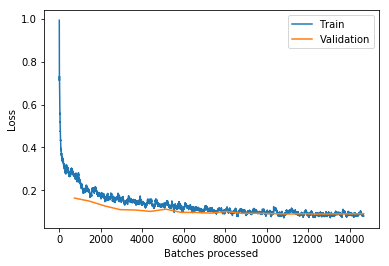

In [13]:
learn.recorder.plot_losses()

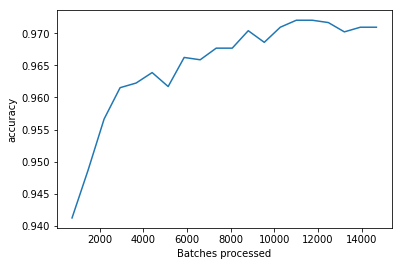

In [14]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


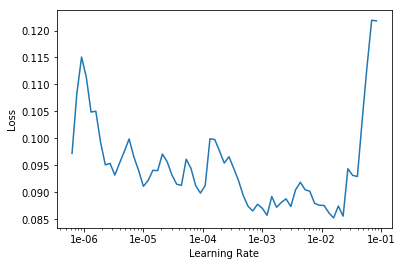

In [17]:
# Find an optimial learning rate
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.112447,0.137618,0.951914,03:21
1,0.159572,0.110412,0.962620,03:21
2,0.170979,0.112529,0.962257,03:21
3,0.162560,0.111074,0.963165,03:19
4,0.137478,0.490082,0.961713,03:22
5,0.150908,3.552042,0.957358,03:18
6,0.111874,0.208861,0.965886,03:20
7,0.091806,1.774335,0.969516,03:20
8,0.076274,2.564093,0.969516,03:22
9,0.083307,0.321671,0.970786,03:20
